In [1]:
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install seaborn



In [2]:
#Importing libraries for managing and visualizing data.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading the amazon_categories dataset.

df_category = pd.read_csv("amazon_categories.csv")

In [4]:
df_category.head()

,id,category_name
0,1,Beading & Jewelry Making
1,2,Fabric Decorating
2,3,Knitting & Crochet Supplies
3,4,Printmaking Supplies
4,5,Scrapbooking & Stamping Supplies


In [5]:
df_category.shape

(248, 2)

In [6]:
df_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             248 non-null    int64 
 1   category_name  248 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.0+ KB


In [7]:
#Loading the amazon_products dataset.

df_products = pd.read_csv('amazon_products.csv')

In [8]:
df_products.shape

(1426337, 11)

In [9]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426337 entries, 0 to 1426336
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   asin               1426337 non-null  object 
 1   title              1426336 non-null  object 
 2   imgUrl             1426337 non-null  object 
 3   productURL         1426337 non-null  object 
 4   stars              1426337 non-null  float64
 5   reviews            1426337 non-null  int64  
 6   price              1426337 non-null  float64
 7   listPrice          1426337 non-null  float64
 8   category_id        1426337 non-null  int64  
 9   isBestSeller       1426337 non-null  bool   
 10  boughtInLastMonth  1426337 non-null  int64  
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 110.2+ MB


In [10]:
#Checking which product has missing title and whether it will impact the analysis.

df_products[df_products['title'].isnull()]

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth
1206102,B00758A9CE,NaN,https://m.media-amazon.com/images/I/71+50RU8o2...,https://www.amazon.com/dp/B00758A9CE,5.0,0,33.08,0.0,19,False,0


Joining the product and category data set together on the category_id

In [11]:
# First we rename the id column in category dataset to match the category_id in second dataset for joining.

df_category.rename(columns={'id':'category_id'}, inplace=True)


In [12]:
#Joining both datasets on category id

df_final = df_products.merge(df_category, on = 'category_id', how = 'left')
df_final.head()

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,category_name
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://m.media-amazon.com/images/I/815dLQKYIY...,https://www.amazon.com/dp/B014TMV5YE,4.5,0,139.99,0.00,104,False,2000,Suitcases
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,https://m.media-amazon.com/images/I/81bQlm7vf6...,https://www.amazon.com/dp/B07GDLCQXV,4.5,0,169.99,209.99,104,False,1000,Suitcases
2,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,https://m.media-amazon.com/images/I/71EA35zvJB...,https://www.amazon.com/dp/B07XSCCZYG,4.6,0,365.49,429.99,104,False,300,Suitcases
3,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,https://m.media-amazon.com/images/I/91k6NYLQyI...,https://www.amazon.com/dp/B08MVFKGJM,4.6,0,291.59,354.37,104,False,400,Suitcases
4,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,https://m.media-amazon.com/images/I/61NJoaZcP9...,https://www.amazon.com/dp/B01DJLKZBA,4.5,0,174.99,309.99,104,False,400,Suitcases


Exploratory Data Analysis


Analysing the TRENDING Product Categories  - 

 - We can group the data based on the categories and then analyse the last month sales.

In [13]:
df_monthly = df_final[['category_name', 'boughtInLastMonth']].groupby(['category_name']).sum('bouhghtInLastMonth')
df_monthly.sort_values(by='boughtInLastMonth', ascending=False, inplace=True)
df_monthly.reset_index(inplace = True)
df_monthly


,category_name,boughtInLastMonth
0,Kitchen & Dining,10432300
1,Hair Care Products,8012850
2,Industrial & Scientific,7093350
3,Household Cleaning Supplies,6875700
4,Skin Care Products,6612150
...,...,...
243,Computer Servers,0
244,Tablet Replacement Parts,0
245,Smart Home: Smart Locks and Entry,0
246,Smart Home: WiFi and Networking,0


Text(0.5, 0, 'Category')

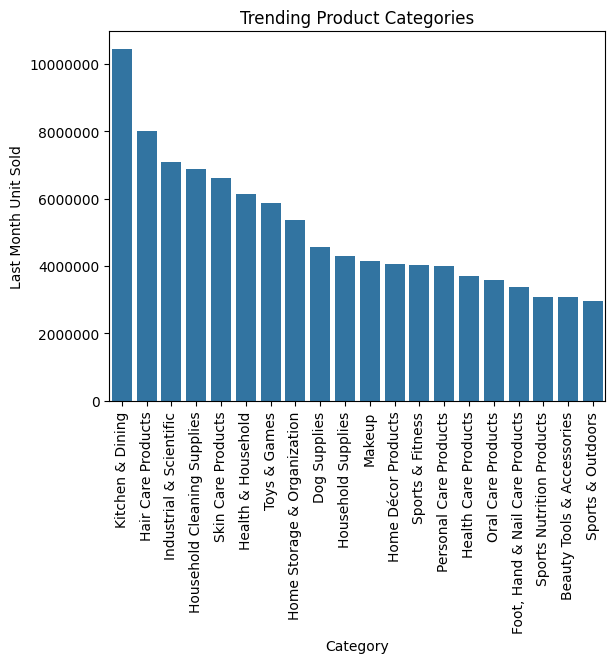

In [14]:
sns.barplot(data = df_monthly.sort_values(by ='boughtInLastMonth', ascending=False).head(20), x = 'category_name', y = 'boughtInLastMonth')
plt.xticks(rotation = 90)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Trending Product Categories")
plt.ylabel('Last Month Unit Sold')
plt.xlabel('Category')


OBSERVATION - 

- The Kitchen and Dining category is selling the most on Amazon.

NUMBER OF LISTED PRODUCTS PER CATEGORY


In [15]:
df_count = df_final.groupby('category_name').count()
df_count.reset_index(inplace=True)
df_count.tail()
df_count = df_count[['category_name', 'title']].rename(columns={'title':'listings'})
df_count.sort_values('listings', ascending=False)

,category_name,listings
78,Girls' Clothing,28619
34,Boys' Clothing,24660
220,Toys & Games,20846
137,Men's Shoes,19822
240,Women's Handbags,18994
...,...,...
194,Smart Home: Lawn and Garden,76
202,Smart Home: Voice Assistants and Hubs,50
196,Smart Home: New Smart Devices,42
74,Garment Bags,40


Text(0.5, 0, 'Category')

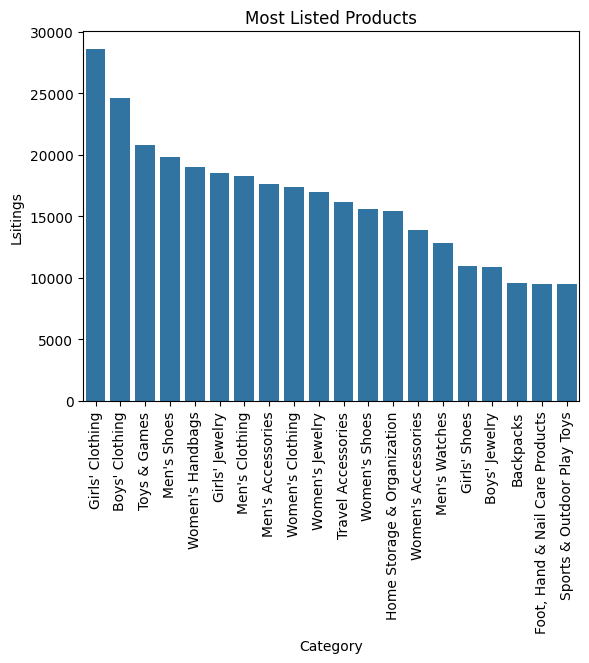

In [16]:
#barplot for the most listed products in our dataset

sns.barplot(data = df_count.sort_values('listings', ascending=False).head(20), x = 'category_name', y = 'listings')
plt.xticks(rotation = 90)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Most Listed Products")
plt.ylabel('Lsitings')
plt.xlabel('Category')

Text(0.5, 0, 'Category')

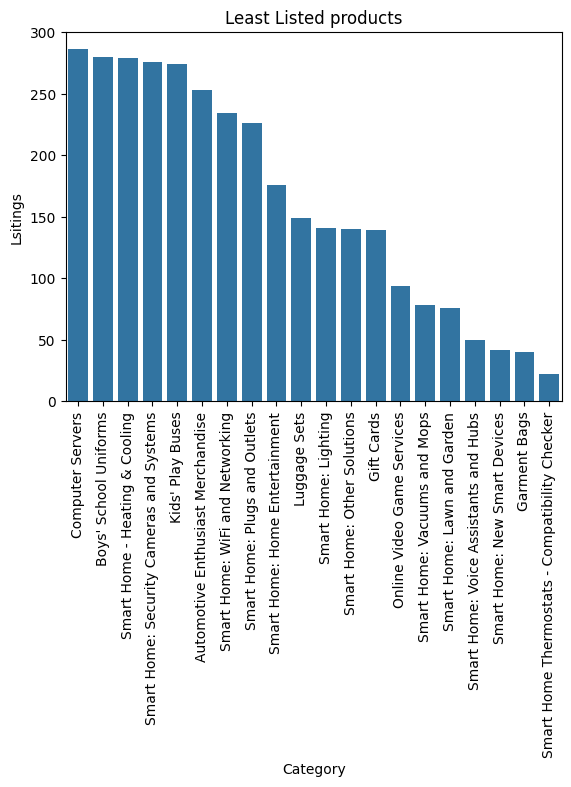

In [17]:
#barplot for the least listed products in our dataset

sns.barplot(data = df_count.sort_values('listings', ascending=False).tail(20), x = 'category_name', y = 'listings')
plt.xticks(rotation = 90)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Least Listed products")
plt.ylabel('Lsitings')
plt.xlabel('Category')

OBSERVATION - 

-The Clothing and Fashion category are most crowded on the Amazon.
-The smart home products are the lowest leasted products.

Let's Analyze the sales of products which are listed least on the marketplace.

In [18]:
# join the df_count and df_monthly dataset to found the last month sales as well as total listed products for each categories

df_trend = df_count.merge(df_monthly, on = 'category_name', how='left')

In [19]:
df_trend.sort_values('listings', ascending=False).tail(20)

,category_name,listings,boughtInLastMonth
52,Computer Servers,286,0
36,Boys' School Uniforms,280,1950
191,Smart Home - Heating & Cooling,279,11600
199,Smart Home: Security Cameras and Systems,276,200
113,Kids' Play Buses,274,11400
5,Automotive Enthusiast Merchandise,253,800
203,Smart Home: WiFi and Networking,234,0
198,Smart Home: Plugs and Outlets,226,600
193,Smart Home: Home Entertainment,176,100
130,Luggage Sets,149,4750


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Computer Servers'),
  Text(1, 0, "Boys' School Uniforms"),
  Text(2, 0, 'Smart Home - Heating & Cooling'),
  Text(3, 0, 'Smart Home: Security Cameras and Systems'),
  Text(4, 0, "Kids' Play Buses"),
  Text(5, 0, 'Automotive Enthusiast Merchandise'),
  Text(6, 0, 'Smart Home: WiFi and Networking'),
  Text(7, 0, 'Smart Home: Plugs and Outlets'),
  Text(8, 0, 'Smart Home: Home Entertainment'),
  Text(9, 0, 'Luggage Sets'),
  Text(10, 0, 'Smart Home: Lighting'),
  Text(11, 0, 'Smart Home: Other Solutions'),
  Text(12, 0, 'Gift Cards'),
  Text(13, 0, 'Online Video Game Services'),
  Text(14, 0, 'Smart Home: Vacuums and Mops'),
  Text(15, 0, 'Smart Home: Lawn and Garden'),
  Text(16, 0, 'Smart Home: Voice Assistants and Hubs'),
  Text(17, 0, 'Smart Home: New Smart Devices'),
  Text(18, 0, 'Garment Bags'),
  Text(19, 0, 'Smart Home Thermostats - Compatibility Checker')])

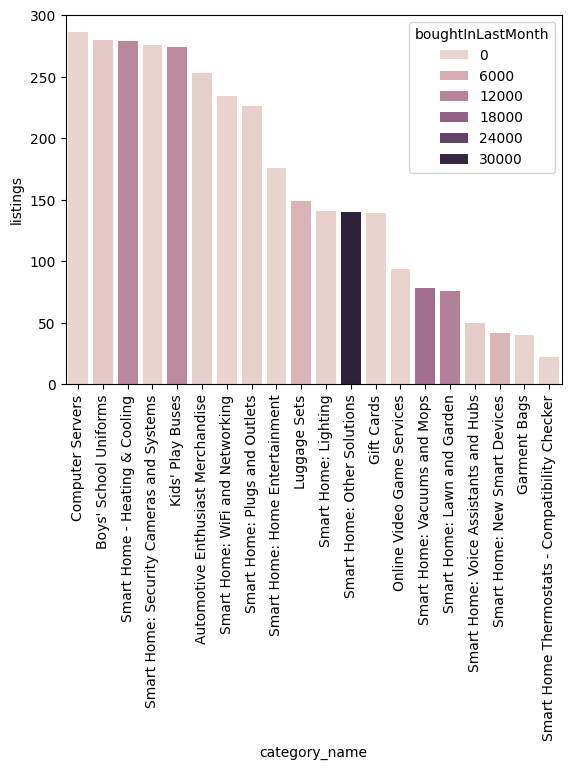

In [20]:
# ploting 

sns.barplot(data = df_trend.sort_values('listings', ascending=False).tail(20), x = 'category_name', y = 'listings', hue = 'boughtInLastMonth')
plt.xticks(rotation = 90)

OBSERVATIONS-

By looking at the visualisation we can say that-
- Smart Home: other solutions, vaccums and mops, Lawns and Gardens can be a low competetion product.
- They despite having very low listed products have a descent last month sales.


In [27]:
#Creating dataset of the best selling products

df_best = df_final[df_final['isBestSeller'] == True]

In [22]:
df_best.head()

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,category_name
924,B00W66LQFO,Men's Eversoft Cotton Stay Tucked Crew T-Shirt,https://m.media-amazon.com/images/I/513fraGQXW...,https://www.amazon.com/dp/B00W66LQFO,4.6,0,18.48,26.00,110,True,10000,Men's Clothing
925,B0C4RMF5PZ,Official Renaissance World Tour Merch Disco Co...,https://m.media-amazon.com/images/I/71Uxhfi5KQ...,https://www.amazon.com/dp/B0C4RMF5PZ,4.8,0,40.00,0.00,110,True,4000,Men's Clothing
933,B077ZMKWVM,"Men's Crew T-Shirts, Multipack, Style G1100",https://m.media-amazon.com/images/I/61Zf5AAGPW...,https://www.amazon.com/dp/B077ZMKWVM,4.6,0,18.99,0.00,110,True,8000,Men's Clothing
938,B07PH2VWX1,"Men's Coolzone Boxer Briefs, Moisture Wicking ...",https://m.media-amazon.com/images/I/81lHfvvXK0...,https://www.amazon.com/dp/B07PH2VWX1,4.6,0,19.59,24.49,110,True,5000,Men's Clothing
944,B01D2GRTIE,Men's Multi-Pack Mesh Ventilating Comfort Fit ...,https://m.media-amazon.com/images/I/61lxpudqRp...,https://www.amazon.com/dp/B01D2GRTIE,4.6,0,14.99,0.00,110,True,6000,Men's Clothing


In [35]:
# finding the average rating and price for best selling products per category

df_rating = df_best[['category_name', 'stars', 'price']].groupby('category_name').mean()

In [34]:
# Lowest rated product categories 

df_rating.sort_values('stars', ascending=True).head(20).reset_index()

,category_name,stars,price
0,"Nintendo Switch Consoles, Games & Accessories",2.150000,41.890000
1,Computer Monitors,2.933333,103.376667
2,Perfumes & Fragrances,3.225000,18.735000
3,"Xbox Series X & S Consoles, Games & Accessories",3.650000,39.745000
4,Girls' Watches,3.900000,18.890000
5,Car Electronics & Accessories,4.050000,40.200000
6,Legacy Systems,4.100000,30.300000
7,Automotive Interior Accessories,4.146667,26.746000
8,Computers & Tablets,4.200000,242.940000
9,"Foot, Hand & Nail Care Products",4.218182,14.238182


OBSERVATION-

-Categories: Games & Accessories, Computer Monitors and Perfume & Fragrances are the lowest rated categories for the best selling products

There is a gap in the market for the quality products in the mentioned categories.